## Reading the DHS + Nightlights dataset

**Incase required data isn't generated,** please follow the steps [below](#generating_dataset) for generating the dataset.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dhs_nightlights_df = pd.read_csv("../poverty_predictor/data/DHS_Nightlights/DHS_Nightlights_data.csv")

In [3]:
dhs_nightlights_df.head()

,Cluster Number,Max,Min,Mean,Median,Std,Average Wealth,Asset Index
0,1.0,6.0,0.0,0.06,0.0,0.596992,-0.531405,2.0
1,2.0,0.0,0.0,0.00,0.0,0.000000,-0.409830,2.5
2,3.0,0.0,0.0,0.00,0.0,0.000000,-0.478115,2.0
3,4.0,0.0,0.0,0.00,0.0,0.000000,-0.435960,2.0
4,5.0,0.0,0.0,0.00,0.0,0.000000,-0.449480,2.0


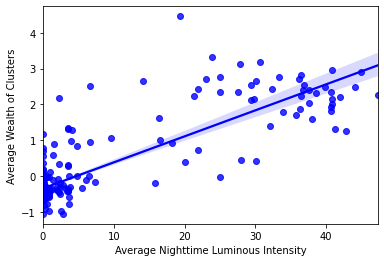

In [8]:
sns.regplot(x = "Mean", y = "Average Wealth", data = dhs_nightlights_df, color = 'blue');
plt.xlabel("Average Nighttime Luminous Intensity");
plt.ylabel("Average Wealth of Clusters");
# plt.savefig('avgwealth_luminosity.png')

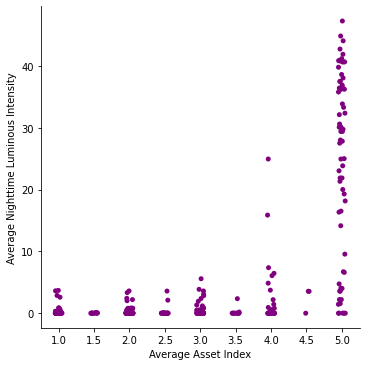

In [9]:
sns.catplot(y='Mean', x='Asset Index', data = dhs_nightlights_df, color = 'purple');
plt.ylabel("Average Nighttime Luminous Intensity");
plt.xlabel("Average Asset Index");
# plt.savefig('avgindx_luminosity.png')

<a id='generating_dataset'></a>

## Generating DHS + Nightlights dataset

Importing DHS Survey data and nightlights features

In [1]:
import import_ipynb
from DHS_datasets import GetData
from Nightlights_features import read_raster, get_nighttime_features

importing Jupyter notebook from DHS_datasets.ipynb
importing Jupyter notebook from Nightlights_features.ipynb


Loading the Survey dataframe

In [2]:
data = GetData('../poverty_predictor/data/GPS/RWGE61FL.shp', '../poverty_predictor/data/Survey/RWHR61FL.dta')
gps_data = data.gps_df()
survey_data = data.survey_df()
wealthgps_df = data.merged_wealth()

In [3]:
dhs_df = wealthgps_df.copy()
dhs_df.head()

,Cluster Number,Latitude,Longitude,Average Wealth,Asset Index
0,1.0,-2.532818,29.684726,-0.531405,2.0
1,2.0,-1.833858,30.310689,-0.409830,2.5
2,3.0,-1.888155,29.478298,-0.478115,2.0
3,4.0,-2.366763,30.521692,-0.435960,2.0
4,5.0,-2.171266,30.018541,-0.449480,2.0


Reading Nightlights raster file

In [4]:
nighttime_file = "../poverty_predictor/data/Nightlights/F182010.v4d_web.stable_lights.avg_vis.tif"
raster_data = read_raster(nighttime_file)

In [5]:
dhs_nightlight_df = dhs_df.apply(lambda x: get_nighttime_features(raster_data, [x['Cluster Number'], x['Average Wealth'], x['Asset Index'], x['Longitude'], x['Latitude']]), axis=1)

In [6]:
dhs_nightlight_df.to_csv("../poverty_predictor/data/DHS_Nightlights/DHS_Nightlights_data.csv", index=False)